### LSTM Model Application

https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
https://machinelearningmastery.com/diagnose-overfitting-underfitting-lstm-models/

## LSTM Hyperparameters with Keras for Time Series Forecasting


 Processing Scenario 4
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002032161C9D0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 352ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 431ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step
2/2 ━━━━━━━━━━━━━

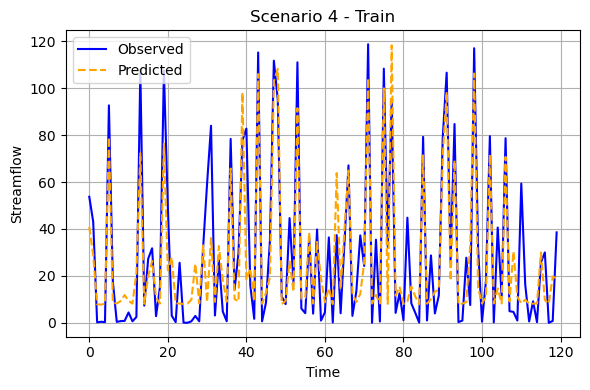

Scenario 4 - Validation
RMSE: 15.10, MAE: 11.32, R²: 0.84, NSE: 0.84


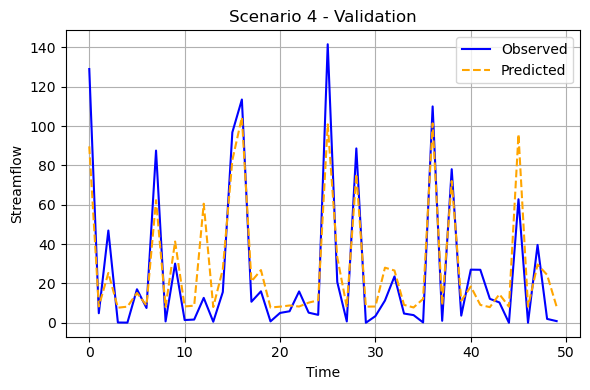

Scenario 4 - Test
RMSE: 21.13, MAE: 15.78, R²: 0.76, NSE: 0.76


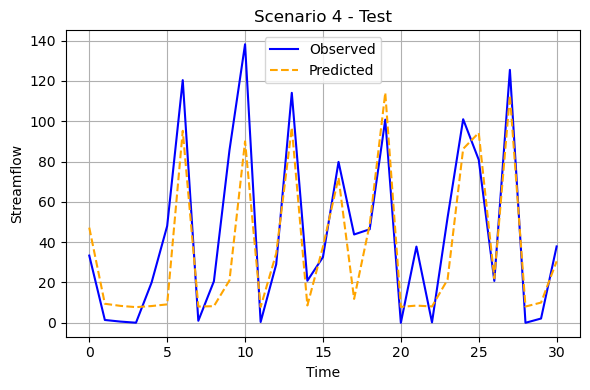


 Processing Scenario 5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 324ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 329ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 362ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 316ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 317ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 797ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 329ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 382ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 414ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 358ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 791ms/step
2

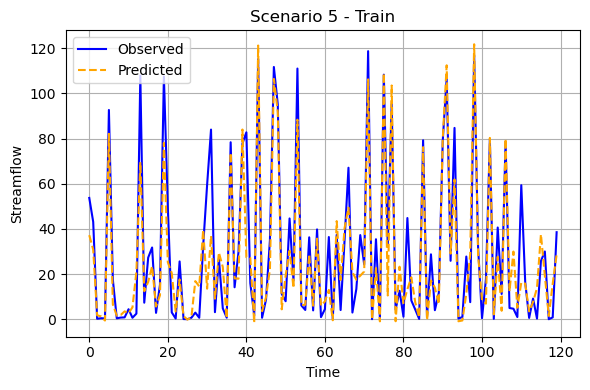

Scenario 5 - Validation
RMSE: 14.11, MAE: 9.17, R²: 0.86, NSE: 0.86


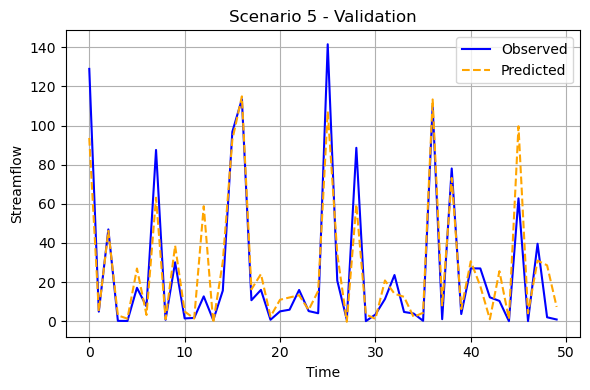

Scenario 5 - Test
RMSE: 19.70, MAE: 12.98, R²: 0.79, NSE: 0.79


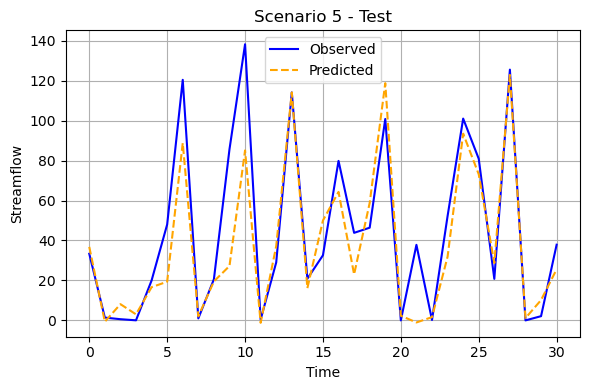

In [1]:
# Import Required Libraries
import numpy as np   # Numerical operations and array manipulation
import pandas as pd  # Data manipulation and analysis (CSV, DataFrame)
import matplotlib.pyplot as plt  # Data visualization (plots, charts)
import tensorflow as tf  # TensorFlow framework for deep learning
from tensorflow.keras.models import Sequential  # Sequential model type for stacking neural network layers
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input   # Layers: LSTM, Dense (output), Dropout, Input
from tensorflow.keras.optimizers import Adam  # Adam optimizer for gradient descent updates
from sklearn.preprocessing import MinMaxScaler  # Normalization/scaling of input and output data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Evaluation metrics
from sklearn.model_selection import train_test_split  # Splits dataset into train/validation/test
import itertools  # Creates hyperparameter combinations for grid search
import os  # File and directory handling
import warnings # suppress warnings


# suppress warnings and Logs
warnings.filterwarnings("ignore", category=UserWarning)  # suppress warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # suppress TensorFlow logs except errors

# set random seed for reproducibility
tf.random.set_seed(42)

# NSE evaluation Metric Function
def nse(y_true, y_pred):  # Defines Nash-Sutcliffe Efficiency (NSE)
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

# Evaluation Metrics & plotting function
def evaluate_and_plot(y_true, y_pred, title):  # Function to calculate metrics + plot predictions
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # Root Mean Square Error
    mae = mean_absolute_error(y_true, y_pred)   # Mean Absolute Error
    r2 = r2_score(y_true, y_pred)  # Coefficient of determination R²
    nse_val = nse(y_true, y_pred)  # NSE metric

    # Print evaluation results
    print(f"{title}")
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}, NSE: {nse_val:.2f}")

    # Plot observed vs predicted streamflow
    plt.figure(figsize=(6, 4))
    plt.plot(y_true, label='Observed', color='blue')
    plt.plot(y_pred, label='Predicted', color='orange', linestyle='--')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Streamflow')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# LSTM model builder function
def build_lstm_model(input_shape, num_layers, num_neurons, dropout_rate, learning_rate):
    model = Sequential()  # Initialize sequential model
    model.add(Input(shape=input_shape))  # Define input shape (timesteps, features)

    # Add LSTM + Dropout layers
    for i in range(num_layers):
        return_seq = i < num_layers - 1   # Return sequences for all LSTMs except last
        model.add(LSTM(num_neurons, activation='relu', return_sequences=return_seq))
        model.add(Dropout(dropout_rate))  # Dropout for regularization (avoid overfitting)

    model.add(Dense(1))  # Final output layer with 1 neuron (streamflow prediction)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')   # Compile model
    return model

# Scenario files 
scenario_files = {
    'Scenario 4': 'cleaned_processed_data_scenario4.csv',
    'Scenario 5': 'cleaned_processed_data_scenario5.csv',
}

# Hyperparameter search space
layer_options = [1, 2]   # Try 1 or 2 LSTM layers
neuron_options = [32, 64, 128]  # Number of neurons per layer
dropout_options = [0.2, 0.3]   # Dropout rates
learning_rates = [0.001, 0.005]  # Learning rates for optimizer
batch_sizes = [16, 32]  # Training batch sizes
epochs_list = [100]  # Epochs for training

# Loop through each Scenario
for scenario_name, file in scenario_files.items():
    print(f"\n Processing {scenario_name}")

    # Load dataset
    df = pd.read_csv(file)  # Read scenario dataset
    df = df.drop(columns=['Date'])  # Drop Date column (not needed for modelling)

    # Split into features (X) and target (y)
    X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values  # X = predictors, y = streamflow target

    # Split data into 60% train set, 25% validation set, &&  15% test set
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2941, random_state=42)
    # (0.2941 ensures validation = 25% overall)

    # Normalize both features and target to a (0–1) range for better model performance
    scaler_X = MinMaxScaler()  # Scale inputs between [0,1]
    scaler_y = MinMaxScaler()  # Scale target between [0,1]
    # Fit scalers on training data only
    X_train_scaled = scaler_X.fit_transform(X_train) # normalize features
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel() # normalize target
    # Transform validation and test data using training scalers
    X_val_scaled = scaler_X.transform(X_val) # normalize features
    y_val_scaled = scaler_y.transform(y_val.reshape(-1, 1)).ravel() # normalize target
    X_test_scaled = scaler_X.transform(X_test) # normalize features
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel() # normalize features

    # Reshape for LSTM input: [samples, time steps, features]
    X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_val_scaled = np.reshape(X_val_scaled, (X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))
    X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    # Define input shape
    input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2])

    # Hyperparameter Grid Search
    best_rmse = float('inf')  # Initialize best RMSE
    best_model = None   # Store best LSTM model
    best_config = None  # Store best hyperparameter set

    # Try every combination of hyperparameters
    for config in itertools.product(layer_options, neuron_options, dropout_options, learning_rates, batch_sizes, epochs_list):
        num_layers, num_neurons, dropout_rate, lr, batch_size, epochs = config

        # Build and train model using scaled data
        model = build_lstm_model(input_shape, num_layers, num_neurons, dropout_rate, lr)
        model.fit(X_train_scaled, y_train_scaled, validation_data=(X_val_scaled, y_val_scaled), epochs=epochs, batch_size=batch_size, verbose=0)

        # Predict on validation set and inverse scale
        y_val_pred = scaler_y.inverse_transform(model.predict(X_val_scaled))
        y_val_true = scaler_y.inverse_transform(y_val_scaled.reshape(-1, 1))

        # Calculate RMSE for validation
        rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred))

        # Update best config if better model found
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model
            best_config = config

    # Print Best Hyperparameter Config
    print(f"\n Best Config for {scenario_name}: Layers={best_config[0]}, Neurons={best_config[1]}, Dropout={best_config[2]}, LR={best_config[3]}, Batch={best_config[4]}, Epochs={best_config[5]}")

    # Final Evaluation on Train, Validation, and Test Sets
    y_train_pred = scaler_y.inverse_transform(best_model.predict(X_train_scaled))
    y_val_pred = scaler_y.inverse_transform(best_model.predict(X_val_scaled))
    y_test_pred = scaler_y.inverse_transform(best_model.predict(X_test_scaled))

    y_train_true = scaler_y.inverse_transform(y_train_scaled.reshape(-1, 1))
    y_val_true = scaler_y.inverse_transform(y_val_scaled.reshape(-1, 1))
    y_test_true = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))

    # Evaluate and plot results for train, validation, and test sets
    evaluate_and_plot(y_train_true, y_train_pred, f"{scenario_name} - Train")
    evaluate_and_plot(y_val_true, y_val_pred, f"{scenario_name} - Validation")
    evaluate_and_plot(y_test_true, y_test_pred, f"{scenario_name} - Test")
